# Week6 - Classifier Evaluation Assignment

- Complete this Jupyter Notebook.  
- Execute the initial cells and answer the numbered questions.  
- Don't import other libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

results = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/lab-evaluation-data.csv')
results.head()

,actual,prob
0,0.0,0.380052
1,1.0,0.827923
2,1.0,0.929093
3,1.0,0.472508
4,1.0,0.906988


## Data Definitions
- `actual`: Whether the event was true or not. A value of 1.0 is True and 0.0 is False.  
- `prob`: The probability that the event was True. This is estimated from a classification model.

## Question 1
- Determine the distribution of the actual event.
- Would you be concerned about bias due to imbalance?

In [2]:

actual_distribution = results['actual'].value_counts(normalize=True)

print("Distribution of actual event:")
print(actual_distribution)

# Check for class imbalance
if actual_distribution.min() < 0.05 or actual_distribution.max() > 0.95:
    print("There is a concern about bias due to imbalance.")
else:
    print("There is no significant concern about bias due to imbalance.")


Distribution of actual event:
1.0    0.6
0.0    0.4
Name: actual, dtype: float64
There is no significant concern about bias due to imbalance.


Insert comments here

Both classes are relatively well represented in the dataset. A class distribution where one class significantly outweighs the other can lead to biased models, where the classifier may tend to predict the majority class more often, ignoring the minority class. Since both classes are reasonably balanced in this dataset, we can expect that the classifier's performance metrics will not be biased towards either class.

## Question 2
- Create a histogram that shows the distribution of the probabilities for the True and False classes.  
- Describe what you observe.

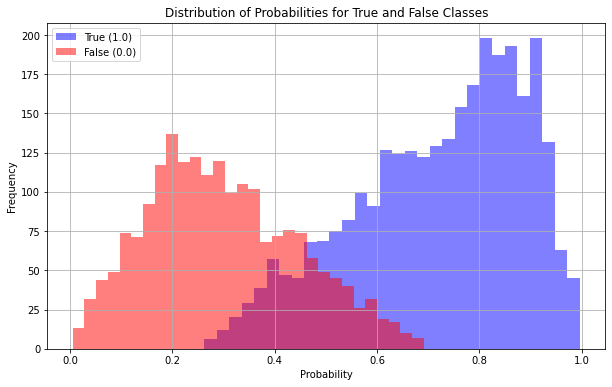

In [3]:
# insert code here
import matplotlib.pyplot as plt

true_probs = results[results['actual'] == 1.0]['prob']
false_probs = results[results['actual'] == 0.0]['prob']

plt.figure(figsize=(10, 6))
plt.hist(true_probs, bins=30, alpha=0.5, color='blue', label='True (1.0)')
plt.hist(false_probs, bins=30, alpha=0.5, color='red', label='False (0.0)')
plt.title('Distribution of Probabilities for True and False Classes')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


Insert comments here

The blue histogram(True) has a distribution that skews towards higher probabilities with a mode peak around 0.8 to 1. While the red histogram(False) skews towards lower probalities. There is an overlap between two distributions around the probability range of 0.4 to 0.6.

## Question 3
- Create a simple confusion matrix. Use `0.5` as the threshold for whether an observation should be considered True or False.  
- Comment on what you observe.

In [4]:
# insert code here

results['predicted'] = (results['prob'] >= 0.5).astype(float)

confusion_matrix = pd.crosstab(results['actual'], results['predicted'], rownames=['Actual'], colnames=['Predicted'])

print("Confusion Matrix:")
print(confusion_matrix)


Confusion Matrix:
Predicted   0.0   1.0
Actual               
0.0        1790   210
1.0         377  2623


Insert comments here

True Negatives (TN): 1790

False Positives (FP): 210

False Negatives (FN): 377

True Positives (TP): 2623
    
The classifier seems to perform well in terms of identifying true positive instances, as evidenced by the high number of true positives compared to false negatives.

## Question 4
- Calculate the accuracy, precision, and recall `without` using any pre-built functions.
- Which measure would you use if this was your model and why?

In [5]:
# insert code here

TP = 2623
TN = 1790
FP = 210
FN = 377

accuracy = (TP + TN) / (TP + TN + FP + FN)

precision = TP / (TP + FP)

recall = TP / (TP + FN)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.8826
Precision: 0.9258736321920226
Recall: 0.8743333333333333


Insert comments here

I would primarily focus on Precision. Precision measures the accuracy of positive predictions, indicating how many of the instances predicted as positive are actually positive. Here, a precision of 0.9258 means that approximately 92.58% of the instances predicted as positive by the model are indeed positive. This is a high precision value, suggesting that the model has a low false positive rate, which is desirable in many scenarios.

## Question 5
- Construct a ROC curve plot.  
- Comment on the fit of the model based on this chart.

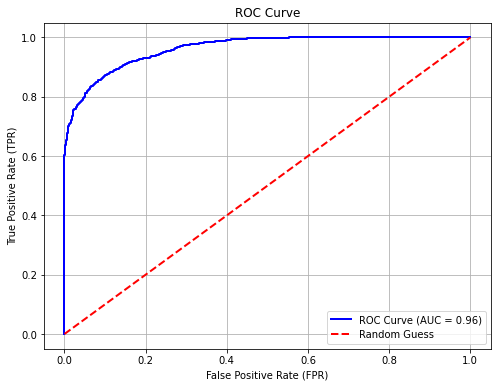

In [6]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(results['actual'], results['prob'])

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


Insert comments here

The area under ROC curve is 0.96 which is a measure of model's performance. The AOC 0.96 suggests that the classifier is performing well, significantly better than the random guessing which is 0.5.

This indicates a good fit.